In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



In [2]:
df=pd.read_csv('economic_index.csv')

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 KB


In [9]:
## DROP COLUMNS
df.drop(columns=['year', 'month','Unnamed: 0' ],axis=1, inplace=True)   

In [10]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [11]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

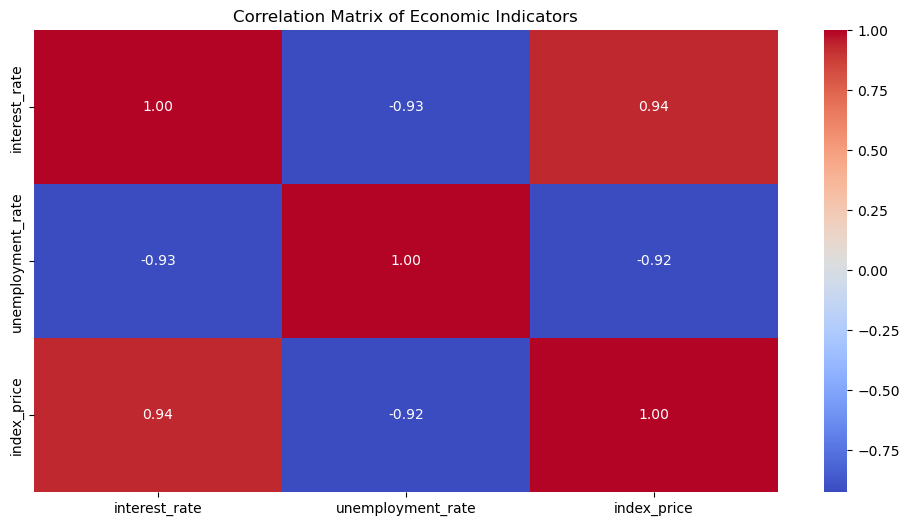

In [12]:
## Visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

In [13]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

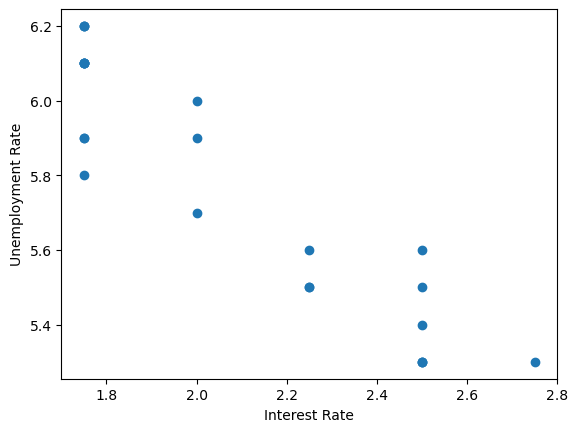

In [17]:
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('Unemployment Rate')

In [21]:
## Indepemdent and dependent variables
X=df[['interest_rate','unemployment_rate']]
y=df.iloc[:, -1] 

In [22]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
## Train test split method
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

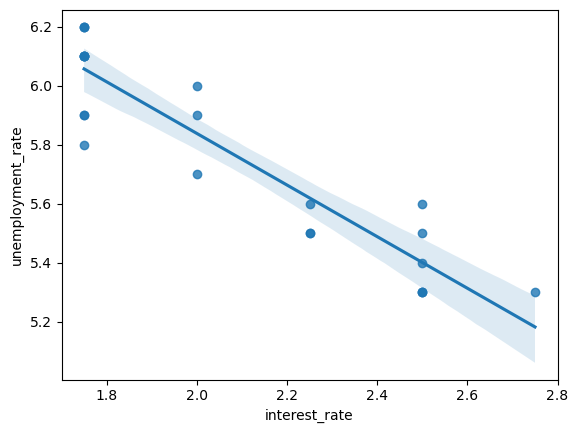

In [27]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)



In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()



In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
## Cross Validation
from sklearn.model_selection import cross_val_score

Validation_score = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)


In [38]:
np.mean(Validation_score)

-5662.72581214445

In [39]:
##Prediction
y_pred=model.predict(X_test)

In [40]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [41]:
##Permormace matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error
# Calculate performance metrics
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')


Root Mean Squared Error: 83.41
Mean Squared Error: 6957.11
R-squared: 0.83
Mean Absolute Error: 71.72


In [43]:
score=r2_score(y_test, y_pred)
print(score)
##Display adjusted R-squared
adjusted_r2 = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(adjusted_r2)

0.8254940547158574
0.6509881094317147


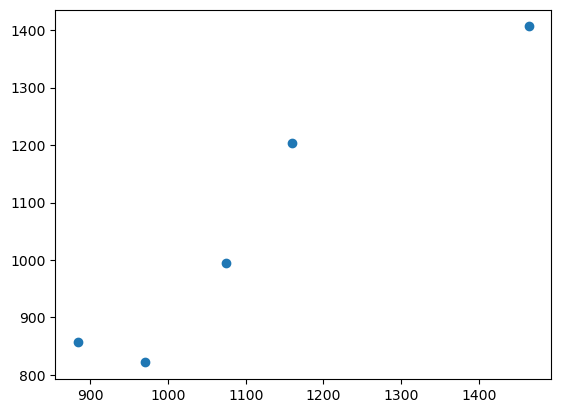

In [44]:
plt.scatter(y_test, y_pred)

In [45]:
residuals = y_test - y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


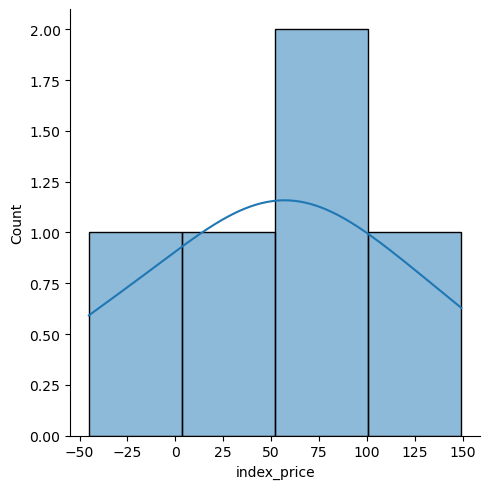

In [46]:
sns.displot(residuals, kde=True)

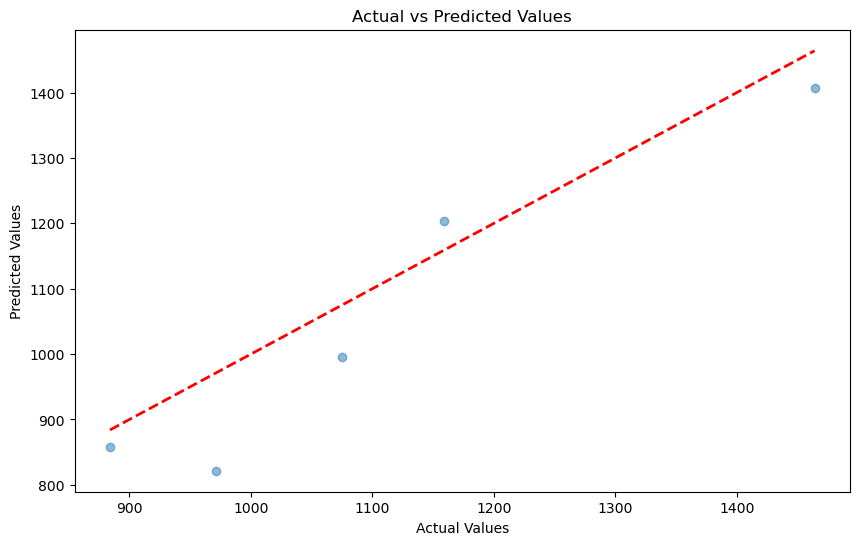

In [47]:
## Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [48]:
##OLS linear regression
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)  # Add constant term for intercept
model = sm.OLS(y_train, X_train_sm).fit()  # Fit the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     75.80
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           6.90e-09
Time:                        12:42:19   Log-Likelihood:                -105.94
No. Observations:                  19   AIC:                             217.9
Df Residuals:                      16   BIC:                             220.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1059.4211     15.966     66.356      0.0

c:\Users\USER\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)
